# Purpose: Approximately integrate methane emissions starting from 1750, and compare to data

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf
from scipy.optimize import curve_fit
import math
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17CH4')

Read two input files separately and assign the year values and methane concentration data

In [2]:
df1 = pd.read_excel('heat18parameters04jan.xlsx')
df1.to_csv('heat18parameters04jan.csv',header=False,index=False)
df1 = pd.read_csv('heat18parameters04jan.csv')

df2 = pd.read_excel('heat17-ch4-1-2017dec14.xlsx') # results of excel sheet from code of radiative forcing
df2.to_csv('heat17-ch4-1-2017dec14.csv',header=False,index=False)
df3 = pd.read_csv('heat17-ch4-1-2017dec14.csv')
df3.drop(df3.index[[-1]],inplace=True)

Rename the files

In [3]:
out1 = 'historical'
out2 = 'ch4'
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] # abbreviations for months to insert in output file name
date = datetime.date.today().strftime("%Y-%m-%d")
date_split = date.split('-') # split the date string we create by symbol "-"
yrs = str(int(date_split[0])-2000) # real years minus 2000
seq = [out1, yrs, out2,months[int(date_split[1])-1],date_split[2]]
seperator = ','
filename = seperator.join(seq).replace(',', '')

In [4]:
b9 = df1.iloc[8,0:4]
ch40 = df1.iloc[18,2]
ndrop = 1749
df4 = df3.iloc[ndrop:]
df4.index = np.arange(0, len(df4))
print (df4)

    Julian                 ppb
0     1750   742.5796049119058
1     1751   742.1584623598503
2     1752   741.9478910838226
3     1753   742.0531767218364
4     1754   742.2637479978641
5     1755   742.5796049119058
6     1756   743.0007474639614
7     1757   743.5271756540308
8     1758   744.2641751201279
9     1759   745.0011745862251
10    1760     745.94874532835
11    1761   747.0016017084888
12    1762   748.1597437266415
13    1763    749.528457020822
14    1764   751.0024559530162
15    1765   752.6870261612385
16    1766   754.3715963694606
17    1767   756.0561665776827
18    1768   757.7407367859048
19    1769   759.4253069941268
20    1770    761.004591564335
21    1771   762.3733048585156
22    1772   763.6367325146821
23    1773   764.6895888948209
24    1774   765.3213027229042
25    1775   765.7424452749597
26    1776   765.8477309129736
27    1777   765.7424452749597
28    1778   765.6371596369459
29    1779   765.4265883609181
..     ...                 ...
238   19

In [5]:
life = b9[3]  # (* from heat17ch4emissions14dec.nb *)
life = float(life)
eps = life/float(b9[2])

def x(t):
    y = (t - float(b9[1]))/float(b9[2])
    return y
x = np.vectorize(x)

def u(t):
    y = 1/(1 + np.exp(-x(t)))
    return y

x0 = (1750 - float(b9[1]))/float(b9[2])
u0 = 1/(1 + np.exp(-x0))

def ch4fit(t):
    y = float(ch40) + life*float(b9[0])*u(t)*(1-eps*(1-u(t))-eps**2*(1-u(t))*(1-2*u(t)))-life*float(b9[0])*u0*(1-eps*(1-u0)-eps**2*(1-u0)*(1-2*u0))
    return y

In [6]:
t0 = ndrop + 1
tmax = 2017
t = range(t0,tmax+1)
yrslist = list(range(t0,tmax+1))
t = [float(i) for i in yrslist]

t1 = 1950
q = eval('ch4fit(t1)')
print (q)

1226.1085248118254


Plot final results

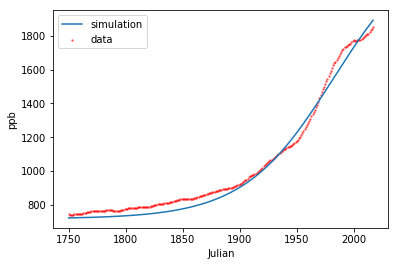

In [7]:
df4 = df4.astype(float)
df4.plot.scatter(x='Julian',y='ppb',s=2,color = 'r', alpha = 0.5,label ='data',marker='o')
y = ch4fit(t)
plt.plot(t,y,label="simulation")
plt.legend(loc='best')
plt.savefig('ch4010.eps',dpi=1000)
plt.savefig('ch4010.pdf',dpi=1000)
plt.show()

In [8]:
ch4data = df4['ppb']
yrsuse = pd.DataFrame({'<CH4>ppbv':t})
ch4data = pd.DataFrame({'historical':ch4data})
ch4fitout = pd.DataFrame({'for CESM':y})
df5 = pd.merge(yrsuse, ch4data,left_index =True, right_index =True,how='outer')
df6 = pd.merge(df5, ch4fitout,left_index =True, right_index =True,how='outer')
print (df6)

df6.loc[-1]=['Year','Data','Fit'] # add an another header
df6.index = df6.index+1 
df6 = df6.sort_index() # reorder rows by sorting their index number in an ascending way
df6.loc[(len(df6))] = ['2018/6/29','heatch4forcing05mayhui.nb',''] # add a footer
df6.to_csv(filename + '.csv', index=False)

     <CH4>ppbv   historical     for CESM
0       1750.0   742.579605   722.065000
1       1751.0   742.158462   722.196218
2       1752.0   741.947891   722.330631
3       1753.0   742.053177   722.468317
4       1754.0   742.263748   722.609356
5       1755.0   742.579605   722.753828
6       1756.0   743.000747   722.901817
7       1757.0   743.527176   723.053408
8       1758.0   744.264175   723.208689
9       1759.0   745.001175   723.367748
10      1760.0   745.948745   723.530677
11      1761.0   747.001602   723.697569
12      1762.0   748.159744   723.868522
13      1763.0   749.528457   724.043632
14      1764.0   751.002456   724.223000
15      1765.0   752.687026   724.406729
16      1766.0   754.371596   724.594925
17      1767.0   756.056167   724.787696
18      1768.0   757.740737   724.985151
19      1769.0   759.425307   725.187405
20      1770.0   761.004592   725.394572
21      1771.0   762.373305   725.606771
22      1772.0   763.636733   725.824125
23      1773.0  